<a href="https://colab.research.google.com/github/AliAhmed354/Final-Year-Project/blob/main/FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
dataf = pd.read_csv('/content/drive/MyDrive/Breast_Cancer_Mortality_Survival_Dataset.csv')
dataf.head(5)
dataf.info()
dataf.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient ID              4024 non-null   object 
 1   Moth of Birth           4024 non-null   int64  
 2   Age                     4015 non-null   float64
 3   Sex                     3947 non-null   object 
 4   Race                    4024 non-null   object 
 5   Marital Status          4024 non-null   object 
 6   Occupation Code         4021 non-null   float64
 7   Adopted Status          4024 non-null   int64  
 8   T Stage                 4024 non-null   object 
 9   N Stage                 4024 non-null   object 
 10  6th Stage               4024 non-null   object 
 11  differentiate           4024 non-null   object 
 12  Grade                   4024 non-null   int64  
 13  A Stage                 4024 non-null   object 
 14  Tumor Size              4021 non-null   

,Moth of Birth,Age,Occupation Code,Adopted Status,Grade,Tumor Size,Survival Months
count,4024.000000,4015.000000,4021.000000,4024.000000,4024.000000,4021.000000,4024.000000
mean,6.481362,54.094396,8.427257,0.496769,2.150596,30.419299,71.472167
std,3.475442,11.417118,4.637345,0.500052,0.638234,21.161080,25.361855
min,1.000000,30.000000,1.000000,0.000000,1.000000,-75.000000,1.000000
25%,3.000000,47.000000,4.000000,0.000000,2.000000,16.000000,56.000000
50%,6.000000,54.000000,8.000000,0.000000,2.000000,25.000000,73.000000
75%,10.000000,61.000000,12.000000,1.000000,3.000000,38.000000,90.000000
max,12.000000,502.000000,16.000000,1.000000,4.000000,140.000000,760.000000


dataf.info()

In [3]:
dataf.head(5)

,Patient ID,Moth of Birth,Age,Sex,Race,Marital Status,Occupation Code,Adopted Status,T Stage,N Stage,...,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Mortality_Status
0,A0012,12,68.0,Female,White,Married,11.0,1,T1,N1,...,Poorly differentiated,3,Regional,4.0,Positive,Positive,24,1,60,Alive
1,A0013,12,50.0,Female,White,Married,11.0,0,T2,N2,...,Moderately differentiated,2,Regional,35.0,Positive,Positive,14,5,62,Alive
2,A0014,11,58.0,Female,White,Divorced,9.0,0,T3,N3,...,Moderately differentiated,2,Regional,63.0,Positive,Positive,14,7,75,Alive
3,A0015,3,58.0,Female,White,Married,10.0,0,T1,N1,...,Poorly differentiated,3,Regional,18.0,Positive,Positive,2,1,84,Alive
4,A0016,1,47.0,Female,White,Married,12.0,0,T2,N1,...,Poorly differentiated,3,Regional,41.0,Positive,Positive,3,1,50,Alive


- we have missing values
- some variables are not relevent and can be removed
- variables can be converted to numerical data types



In [4]:
dataf.isnull().sum()

,0
Patient ID,0
Moth of Birth,0
Age,9
Sex,77
Race,0
Marital Status,0
Occupation Code,3
Adopted Status,0
T Stage,0
N Stage,0


In [5]:
dataf.describe()

,Moth of Birth,Age,Occupation Code,Adopted Status,Grade,Tumor Size,Survival Months
count,4024.000000,4015.000000,4021.000000,4024.000000,4024.000000,4021.000000,4024.000000
mean,6.481362,54.094396,8.427257,0.496769,2.150596,30.419299,71.472167
std,3.475442,11.417118,4.637345,0.500052,0.638234,21.161080,25.361855
min,1.000000,30.000000,1.000000,0.000000,1.000000,-75.000000,1.000000
25%,3.000000,47.000000,4.000000,0.000000,2.000000,16.000000,56.000000
50%,6.000000,54.000000,8.000000,0.000000,2.000000,25.000000,73.000000
75%,10.000000,61.000000,12.000000,1.000000,3.000000,38.000000,90.000000
max,12.000000,502.000000,16.000000,1.000000,4.000000,140.000000,760.000000


- max age too high
- -75 can't be a tumor size
- 760 months an outlier




In [6]:
df = dataf.drop(['Patient ID ','Moth of Birth', 'Sex', 'Marital Status', 'Occupation Code', 'Adopted Status'], axis=1, inplace = False )
df.head()


,Age,Race,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Mortality_Status
0,68.0,White,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24,1,60,Alive
1,50.0,White,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14,5,62,Alive
2,58.0,White,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14,7,75,Alive
3,58.0,White,T1,N1,IIA,Poorly differentiated,3,Regional,18.0,Positive,Positive,2,1,84,Alive
4,47.0,White,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,Positive,Positive,3,1,50,Alive


In [7]:
df = df.dropna()
df.isnull().sum()

,0
Age,0
Race,0
T Stage,0
N Stage,0
6th Stage,0
differentiate,0
Grade,0
A Stage,0
Tumor Size,0
Estrogen Status,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4007 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4007 non-null   float64
 1   Race                    4007 non-null   object 
 2   T Stage                 4007 non-null   object 
 3   N Stage                 4007 non-null   object 
 4   6th Stage               4007 non-null   object 
 5   differentiate           4007 non-null   object 
 6   Grade                   4007 non-null   int64  
 7   A Stage                 4007 non-null   object 
 8   Tumor Size              4007 non-null   float64
 9   Estrogen Status         4007 non-null   object 
 10  Progesterone Status     4007 non-null   object 
 11  Regional Node Examined  4007 non-null   object 
 12  Reginol Node Positive   4007 non-null   object 
 13  Survival Months         4007 non-null   int64  
 14  Mortality_Status        4007 non-null   objec

In [9]:
df['T Stage '].unique()
df['N Stage'].unique()
df['differentiate'].unique()
df['A Stage'].unique()


array(['Regional', 'Distant'], dtype=object)

In [10]:
df['T Stage ']= df['T Stage '].map({'T1':1, 'T2':2, 'T3':3, 'T4':4})


<ipython-input-10-35982bfc97ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['T Stage ']= df['T Stage '].map({'T1':1, 'T2':2, 'T3':3, 'T4':4})


In [11]:
df['N Stage'] = df['N Stage'].map({'N1':1, 'N2':2, 'N3':3})

<ipython-input-11-6c83d1f31225>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['N Stage'] = df['N Stage'].map({'N1':1, 'N2':2, 'N3':3})


In [12]:
df['differentiate'] = df['differentiate'].map({'Poorly differentiated':1, 'Moderately differentiated':2,'Well differentiated':3, 'Undifferentiated':4})



<ipython-input-12-5c6d55cd3d1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['differentiate'] = df['differentiate'].map({'Poorly differentiated':1, 'Moderately differentiated':2,'Well differentiated':3, 'Undifferentiated':4})


In [13]:
df['A Stage'] = df['A Stage'].map({'Regional':1, 'Distant':2})


<ipython-input-13-d9aa03875f01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['A Stage'] = df['A Stage'].map({'Regional':1, 'Distant':2})


In [14]:
df['Estrogen Status'] = df['Estrogen Status'].map({'Negative':1, 'Positive':2})

In [15]:
df['Progesterone Status'] = df['Progesterone Status'].map({'Negative':1, 'Positive':2})


In [16]:
df['6th Stage'] = df['6th Stage'].map({'IIA':1, 'IIB':2, 'IIIA':3, 'IIIB':4, 'IIIC':5 })

In [17]:
df['Mortality_Status'] = df['Mortality_Status'].map({'Alive':0, 'Dead':1})

In [18]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['Race'] = label_encoder.fit_transform(df['Race'])

In [19]:
df[['Regional Node Examined', 'Reginol Node Positive']] = df[['Regional Node Examined', 'Reginol Node Positive']].apply(pd.to_numeric,errors='coerce')
df.dropna(inplace=True)
df[['Regional Node Examined', 'Reginol Node Positive']] = df[['Regional Node Examined', 'Reginol Node Positive']].apply(pd.to_numeric,errors='coerce')

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3990 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3990 non-null   float64
 1   Race                    3990 non-null   int64  
 2   T Stage                 3990 non-null   int64  
 3   N Stage                 3990 non-null   int64  
 4   6th Stage               3990 non-null   int64  
 5   differentiate           3990 non-null   int64  
 6   Grade                   3990 non-null   int64  
 7   A Stage                 3990 non-null   int64  
 8   Tumor Size              3990 non-null   float64
 9   Estrogen Status         3990 non-null   int64  
 10  Progesterone Status     3990 non-null   int64  
 11  Regional Node Examined  3990 non-null   float64
 12  Reginol Node Positive   3990 non-null   float64
 13  Survival Months         3990 non-null   int64  
 14  Mortality_Status        3990 non-null   float

In [20]:
df.describe()

,Age,Race,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Mortality_Status
count,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000,3990.000000
mean,54.118546,1.776441,1.782456,1.437845,2.319549,1.868421,2.150627,1.022807,30.311028,1.933584,1.827068,14.635840,4.154135,71.473434,0.152130
std,11.424191,0.563489,0.764133,0.693429,1.267008,0.642741,0.638545,0.149307,20.983317,0.249039,0.378236,18.712734,5.111693,25.367723,0.359192
min,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,47.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,16.000000,2.000000,2.000000,9.000000,1.000000,56.000000,0.000000
50%,54.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,25.000000,2.000000,2.000000,14.000000,2.000000,73.000000,0.000000
75%,61.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,1.000000,38.000000,2.000000,2.000000,19.000000,5.000000,90.000000,0.000000
max,502.000000,2.000000,4.000000,3.000000,5.000000,4.000000,4.000000,2.000000,140.000000,2.000000,2.000000,1080.000000,46.000000,760.000000,1.000000


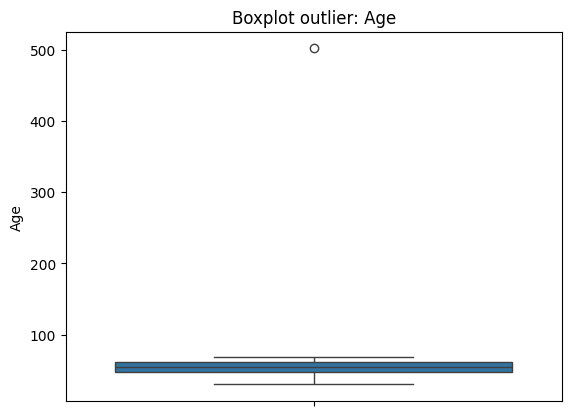

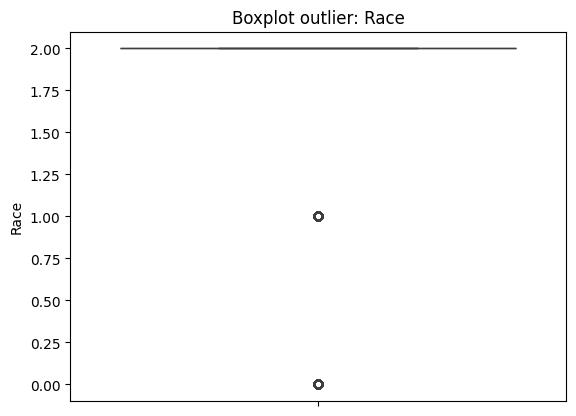

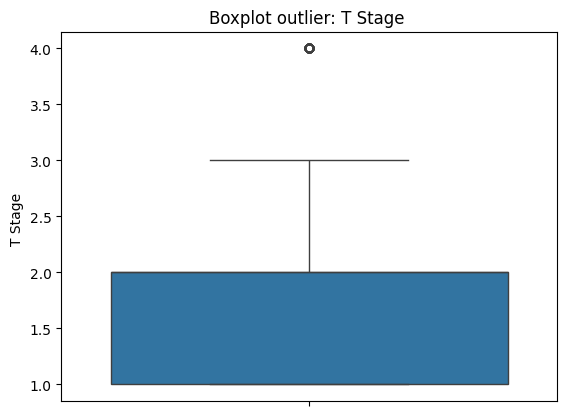

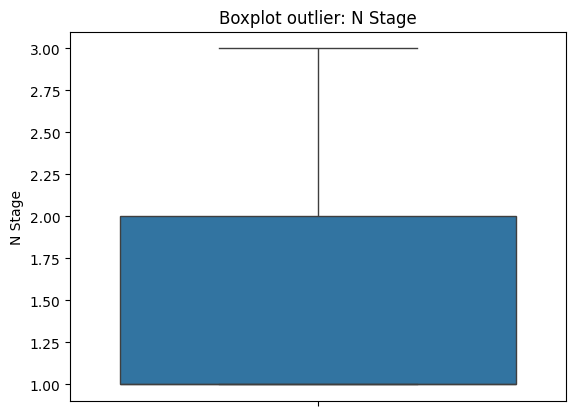

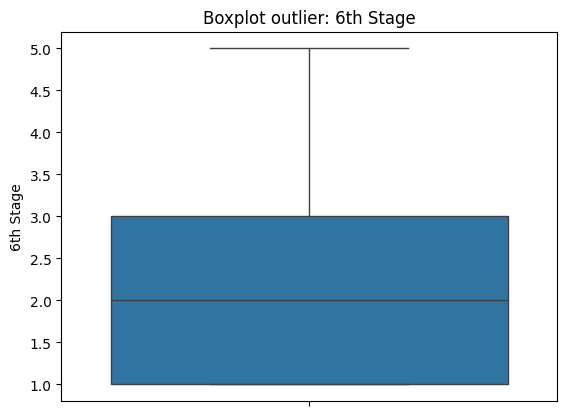

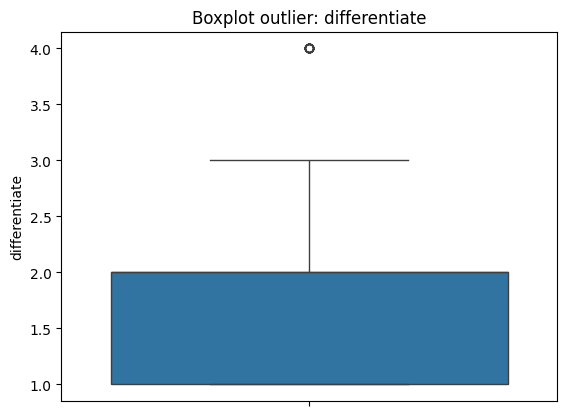

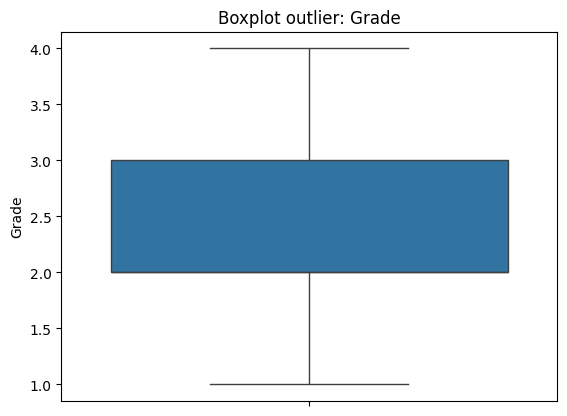

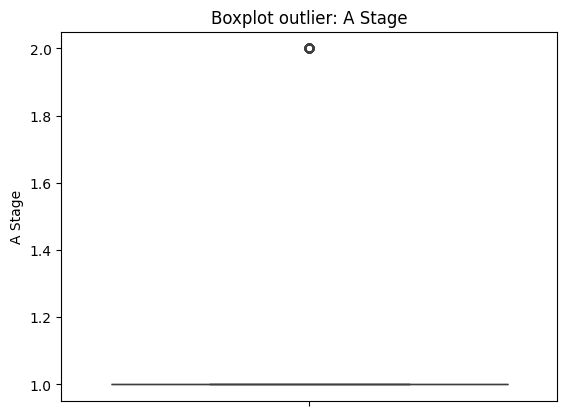

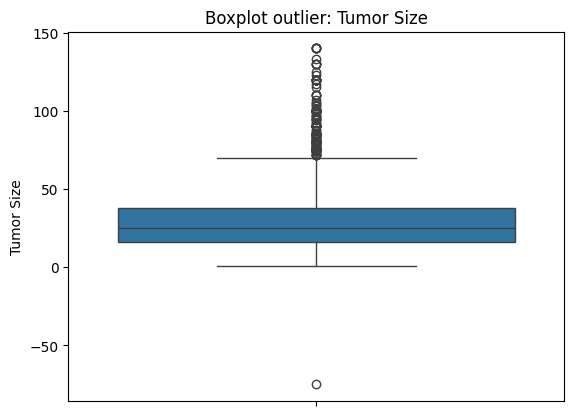

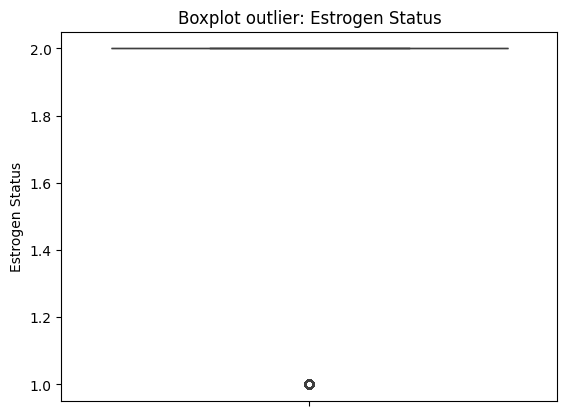

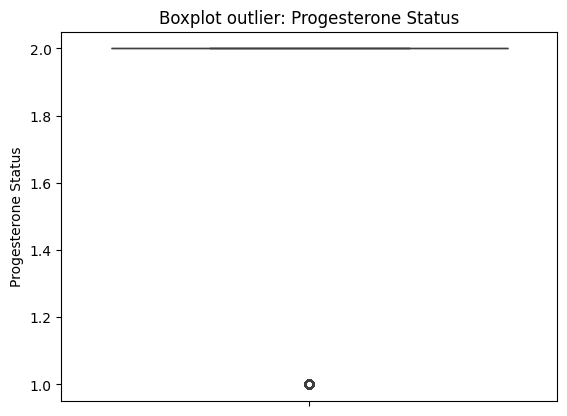

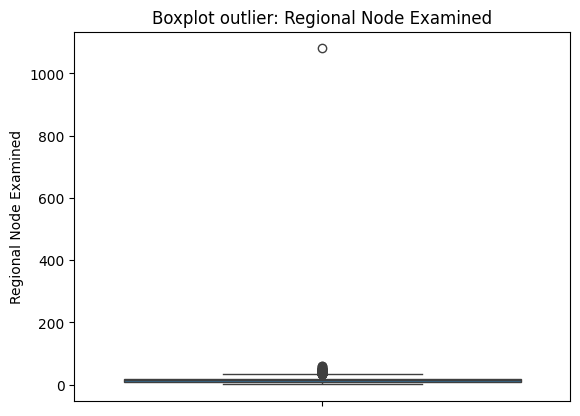

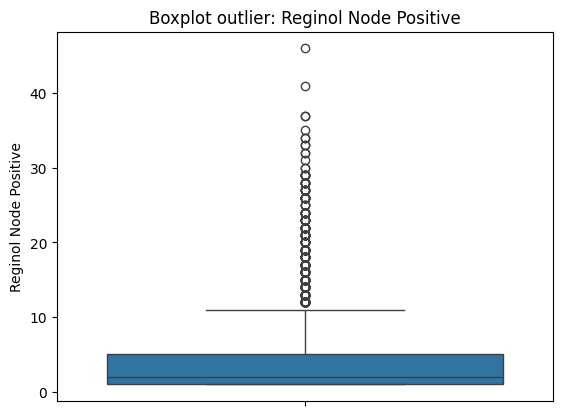

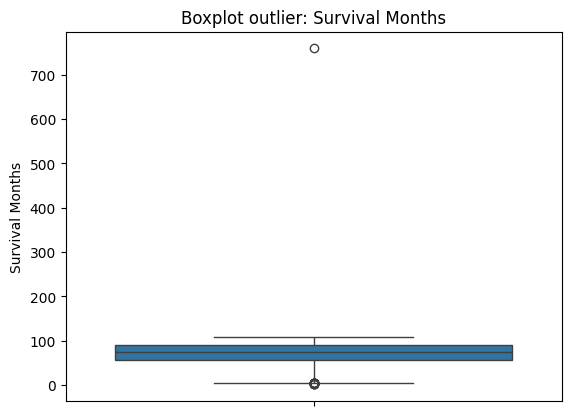

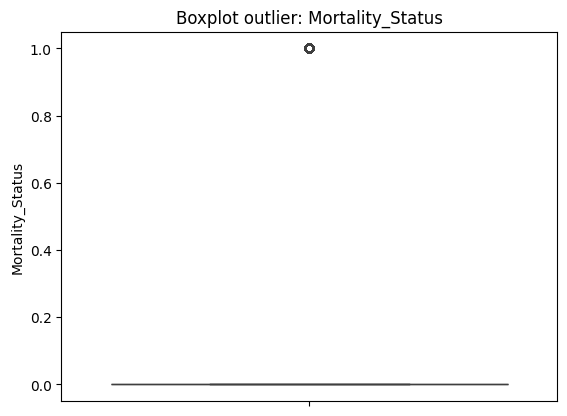

In [33]:
def outlierbxplt(df):
  for column in df:
    sns.boxplot(df[column])
    plt.title('Boxplot outlier: ' + column)
    plt.show()

outlierbxplt(df)


In [21]:
## outlier removal
## in the describe function showing some abdnorammly high values

cleancolumns = ['Age', 'Tumor Size', 'Regional Node Examined', 'Survival Months']

def outliers(df, cleancolumns):
  cleandf = df.copy()
  mask = pd.Series([True]*len(cleandf), index = cleandf.index)

  for cols in cleancolumns:
    q1 = df[cols].quantile(0.25)
    q3 = df[cols].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 5.0*iqr
    upper = q3 + 5.0*iqr

    mask &= df[cols].between(lower,upper)

  return cleandf[mask]

newdf = outliers(df, cleancolumns)
newdf = newdf[newdf['Tumor Size'] != -75]
newdf.describe()

,Age,Race,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Mortality_Status
count,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000,3986.000000
mean,54.010537,1.776217,1.782238,1.437030,2.318364,1.868289,2.150778,1.022579,30.345459,1.933517,1.826894,14.363021,4.146764,71.303813,0.152032
std,8.955145,0.563727,0.764157,0.692801,1.266001,0.643050,0.638847,0.148576,20.923637,0.249155,0.378386,8.095535,5.098113,22.909188,0.359097
min,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,47.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,16.000000,2.000000,2.000000,9.000000,1.000000,56.000000,0.000000
50%,54.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,25.000000,2.000000,2.000000,14.000000,2.000000,73.000000,0.000000
75%,61.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,1.000000,38.000000,2.000000,2.000000,19.000000,5.000000,90.000000,0.000000
max,69.000000,2.000000,4.000000,3.000000,5.000000,4.000000,4.000000,2.000000,140.000000,2.000000,2.000000,61.000000,46.000000,107.000000,1.000000


In [36]:
newdf['Mortality_Status'].value_counts(normalize=True)*100

,proportion
Mortality_Status,
0.0,84.796789
1.0,15.203211


In [60]:
## knn for mortality

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report

## create x and y values
Mortality_knn_X = newdf.drop(columns = ['Mortality_Status'])
Mortality_knn_Y = newdf['Mortality_Status']

print(Mortality_knn_Y.value_counts(normalize=True))

## train and test split
## mknn = moraltiy knn
mknn_X_train, mknn_X_test, mknn_y_train, mknn_y_test = train_test_split(
    Mortality_knn_X, Mortality_knn_Y,test_size=0.2, random_state=10, stratify = Mortality_knn_Y)

## scaling
scaler = StandardScaler()
mknn_X_trainSc = scaler.fit_transform(mknn_X_train)
mknn_X_testSc = scaler.fit_transform(mknn_X_test)

## training the model
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(mknn_X_trainSc, mknn_y_train)

## run on test data
mknn_y_prediction = knn.predict(mknn_X_testSc)

## evaluate
print(accuracy_score(mknn_y_test, mknn_y_prediction))
print(f1_score(mknn_y_test, mknn_y_prediction))
print(classification_report(mknn_y_test, mknn_y_prediction))


Mortality_Status
0.0    0.847968
1.0    0.152032
Name: proportion, dtype: float64
0.8809523809523809
0.4025157232704403
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       677
         1.0       0.84      0.26      0.40       121

    accuracy                           0.88       798
   macro avg       0.86      0.63      0.67       798
weighted avg       0.88      0.88      0.85       798



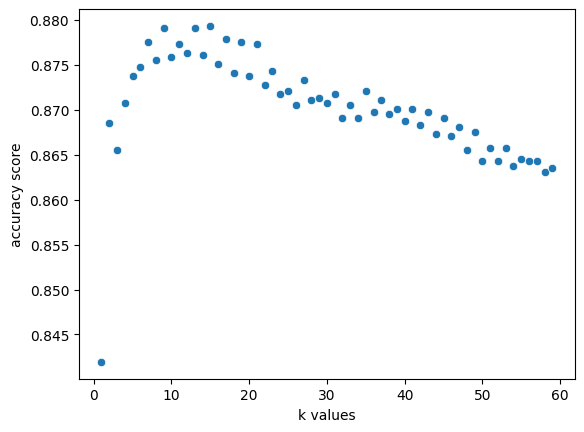

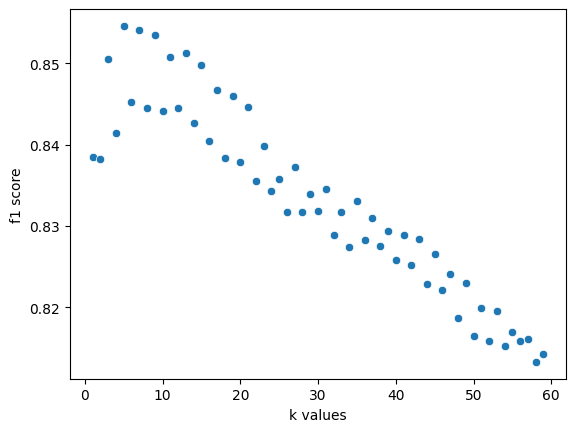

In [38]:
## finding the best k
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt


kvalues = [i for i in range (1,60)]
accscores = []
fscores = []

scaler = StandardScaler()
scaledknn = scaler.fit_transform(Mortality_knn_X)

for k in kvalues:
  knn = KNeighborsClassifier(n_neighbors=k)
  accscore = cross_val_score(knn, scaledknn, Mortality_knn_Y, cv=5, scoring='accuracy')
  fscore = cross_val_score(knn, scaledknn, Mortality_knn_Y, cv=5, scoring='f1_weighted')
  accscores.append(np.mean(accscore))
  fscores.append(np.mean(fscore))


sns.scatterplot(x = kvalues, y = accscores)
plt.xlabel('k values')
plt.ylabel('accuracy score')
plt.show()

sns.scatterplot(x = kvalues, y = fscores)
plt.xlabel('k values')
plt.ylabel('f1 score')
plt.show()


In [59]:
## testing knn with undersampling

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 10)
x_knnrandom, y_knnrandom = rus.fit_resample(Mortality_knn_X, Mortality_knn_Y)

## apply undersampled date to knn model

xtrain_random, xtest_random, ytrain_random, ytest_random = train_test_split(
    x_knnrandom, y_knnrandom, test_size = 0.2, random_state = 10
)

xtrain_randomscale = scaler.fit_transform(xtrain_random)
xtest_randomscale = scaler.fit_transform(xtest_random)

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(xtrain_randomscale, ytrain_random)

## run on test data
randomknnpred = knn.predict(xtest_randomscale)


## evaluate
print(accuracy_score(ytest_random, randomknnpred))
print(f1_score(ytest_random, randomknnpred))
print(classification_report(ytest_random, randomknnpred))


0.7283950617283951
0.6886792452830188
              precision    recall  f1-score   support

         0.0       0.72      0.81      0.76       129
         1.0       0.74      0.64      0.69       114

    accuracy                           0.73       243
   macro avg       0.73      0.72      0.72       243
weighted avg       0.73      0.73      0.73       243



In [57]:
## svm for mortality predction
from sklearn.svm import SVC

## x and y values
mortality_svm_x = newdf.drop(columns = ['Mortality_Status'])
mortality_svm_y = newdf['Mortality_Status']

## split test and train
msvm_x_train, msvm_x_test, msvm_y_train, msvm_y_test = train_test_split(
    mortality_svm_x, mortality_svm_y, test_size = 0.2, random_state = 10, stratify = mortality_svm_y
)

##scale features
msvm_x_train_scale = scaler.fit_transform(msvm_x_train)
msvm_x_test_scale = scaler.fit_transform(msvm_x_test)

## set the kernel - radial basis function
svmrbf = SVC(kernel = 'rbf')

## train the model
svmrbf.fit(msvm_x_train_scale, msvm_y_train)

## run on test data
msvm_pred = svmrbf.predict(msvm_x_test_scale)

## evaluate performance
print(accuracy_score(msvm_y_test, msvm_pred))
print(f1_score(msvm_y_test, msvm_pred))
print(classification_report(msvm_y_test, msvm_pred))

0.9010025062656641
0.5485714285714286
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       677
         1.0       0.89      0.40      0.55       121

    accuracy                           0.90       798
   macro avg       0.90      0.69      0.75       798
weighted avg       0.90      0.90      0.88       798



<ipython-input-42-6417049fc163>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newdf['Survival Months'])


-0.5909439945343706


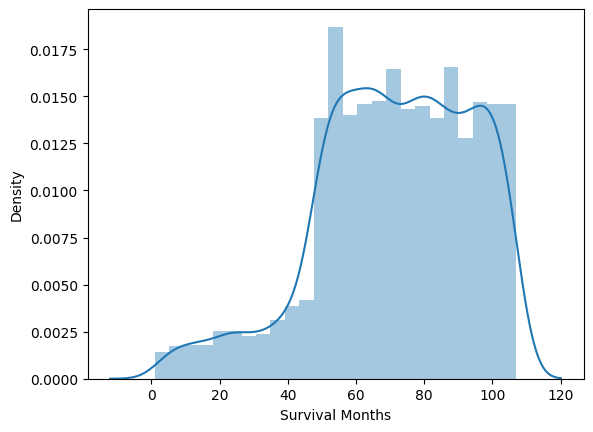

In [42]:
# lin regression for predicting survival months

from sklearn.linear_model import LinearRegression
from scipy.stats import skew

##checking distribution
sns.distplot(newdf['Survival Months'])
#plt.show()

linregX = newdf.drop(columns=['Survival Months'])
linregY = newdf['Survival Months']

linregXtrain, linregXtest, linregYtrain, linregYtest = train_test_split(
    linregX, linregY, test_size = 0.2, random_state=10
)

regressor = LinearRegression()
regressor.fit(linregXtrain, linregYtrain)

linregpred = regressor.predict(linregXtest)

print(skew(linregY))


In [55]:
## random forrest regression for predicting survival months

from sklearn.ensemble import RandomForestRegressor


rfrX = newdf.drop(columns=['Survival Months'])
rfrY = newdf['Survival Months']

rfrXtrain, rfrXtest, rfrYtrain, rfrYtest = train_test_split(
    rfrX, rfrY, test_size = 0.2, random_state=10
)

rfr = RandomForestRegressor(n_estimators = 100, random_state = 10)

rfr.fit(rfrXtrain, rfrYtrain)

rfrYpred = rfr.predict(rfrXtest)



In [62]:
## evaluating regression models

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

linmae = mean_absolute_error(linregYtest, linregpred)
linmse = mean_squared_error(linregYtest, linregpred)
linrmse = np.sqrt(linmse)
linr2 = r2_score(linregYtest, linregpred)

rfrmae = mean_absolute_error(rfrYtest, rfrYpred)
rfrmse = mean_squared_error(rfrYtest, rfrYpred)
rfrrmse = np.sqrt(rfrmse)
rfrr2 = r2_score(rfrYtest, rfrYpred)

print(linmae, linmse,linrmse, linr2)
print(rfrmae, rfrmse,rfrrmse, rfrr2)


16.198409449522586 386.0867640314531 19.649090666782854 0.19472954832905587
16.87605403389426 421.76156576430947 20.53683436570275 0.12032175614079976


In [61]:
#knn
print(accuracy_score(mknn_y_test, mknn_y_prediction))
print(f1_score(mknn_y_test, mknn_y_prediction))
print(classification_report(mknn_y_test, mknn_y_prediction))

#knn undersmapled

print(accuracy_score(ytest_random, randomknnpred))
print(f1_score(ytest_random, randomknnpred))
print(classification_report(ytest_random, randomknnpred))

##svm
print(accuracy_score(msvm_y_test, msvm_pred))
print(f1_score(msvm_y_test, msvm_pred))
print(classification_report(msvm_y_test, msvm_pred))


0.8809523809523809
0.4025157232704403
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93       677
         1.0       0.84      0.26      0.40       121

    accuracy                           0.88       798
   macro avg       0.86      0.63      0.67       798
weighted avg       0.88      0.88      0.85       798

0.7283950617283951
0.6886792452830188
              precision    recall  f1-score   support

         0.0       0.72      0.81      0.76       129
         1.0       0.74      0.64      0.69       114

    accuracy                           0.73       243
   macro avg       0.73      0.72      0.72       243
weighted avg       0.73      0.73      0.73       243

0.9010025062656641
0.5485714285714286
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       677
         1.0       0.89      0.40      0.55       121

    accuracy                           0.90       798
   macro avg  